# Phipp's Potential
> "Phipp, Conservation of Energy, odeint"

- toc: false
- branch: master
- badges: true
- comments: true
- author: JHM
- categories: [fastpages, jupyter]



Here we examine Phipp's potential $P=\frac{1}{r} \sqrt{1-\frac{r'}{c}}$. It's clear that Phipp's potential imposes an upper bound on the velocities of particles in free fall relative to $P$. But while Phipp's potential guarantees subluminal velocities, it does not appear to satisfy a conservation of energy, and the quantity $T+P$ is not constant along trajectories. 

The Phipp potential can induce negative effective mass at small distances, similar to the case of Weber's potential. However the critical radius depends on the relative velocity of the particles. By contrast Weber's critical radius depends only on the mass $m$ and $c^2$. 

These two facts are demonstrated in the cells below, and demonstrates some severe disadvantages to Phipp's potential. We are therefore inclined to investigate Weber's potential as a model of electrodynamics.



In [ ]:
from sympy import *
t=symbols('t')
m=symbols('m')
c=symbols('c')
r=Function('r')(t)
P=Function('P')(r,t)
F=Function('F')(r,t)


P=(r**-1)*sqrt(1-r.diff(t)/c)
F=(-1)*(P.diff(t))*((r.diff(t))**-1)

pprint(simplify(P))
print()
pprint(simplify(F))  ## symbolic computation of the Force law. 

      ______________
     ╱     d        
    ╱  c - ──(r(t)) 
   ╱       dt       
  ╱    ──────────── 
╲╱          c       
────────────────────
        r(t)        

                                 2      
                                d       
                          r(t)⋅───(r(t))
                                 2      
⎛    d       ⎞ d               dt       
⎜c - ──(r(t))⎟⋅──(r(t)) + ──────────────
⎝    dt      ⎠ dt               2       
────────────────────────────────────────
         ______________                 
        ╱     d                         
       ╱  c - ──(r(t))                  
      ╱       dt         2    d         
 c⋅  ╱    ──────────── ⋅r (t)⋅──(r(t))  
   ╲╱          c              dt        


The initial total energy T+P is equal to: 0.3257156133373373
The luminal energy is: 0.25
The energy is subliminal: False
Phipp`s critical radius is equal to: 1.4309087883533131
The initial radius r and velocity r` is within Phipp`s critical distance: False


Text(0.5, 0.92, 'velocity')

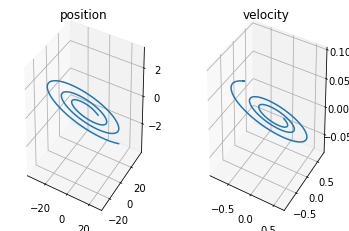

In [ ]:
## import the basic packages.
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


m=0.5 ## mass of second test particle
c=1.0 ## speed of light constant in Weber's potential

## Kinetic Energy: we use the naive expression for vis viva. Is it correct?  
def T(vx, vy, vz):
    return m*(vx*vx+vy*vy+vz*vz)/2    

## Phipp's Potential Energy
def P(x,y,z,vx,vy,vz):
    r=(x*x + y*y + z*z)**0.5
    rdot=(x*vx+y*vy+z*vz)/r
    
    return (r**-1)*(1-rdot/c)**0.5 

## Integrating equations of motion relative Phipp's Force Law.

def phipp(t, state):
    x, y, z, vx, vy, vz = state
    
    r=(x*x + y*y + z*z)**0.5
    rdot=(x*vx+y*vy+z*vz)/r
    
    A=r**-2
    B=(1-rdot)**0.5
    
    C=(m-
       (
           2*r*rdot*((1-rdot)**0.5)
       )**-1
       )**-1

    dxdt = vx
    dydt = vy
    dzdt = vz
  
    dvxdt = (x/r)*A*B*C
    dvydt = (y/r)*A*B*C
    dvzdt = (z/r)*A*B*C
  
     
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]
 
t_span = (0.0, 1000.0)
t = np.arange(0.0, 1000.0, 0.001)
 
y0=[10, 0.3, 0, -0.2, -0.9, .1]  ## initial state of the system y0=[x, y, z, vx, vy, vz]

result = odeint(phipp, y0, t, tfirst=True)
 
Energy=T(y0[3], y0[4], y0[5] ) + P(y0[0],y0[1],y0[2],y0[3],y0[4],y0[5])

print('The initial total energy T+P is equal to:', Energy)
print('The luminal energy is:', m*c*c/2)
print('The energy is subliminal:', Energy < m*c**2 /2)

r = ( y0[0]*y0[0] + y0[1]*y0[1] + y0[2]*y0[2])**0.5
rdot = ( y0[0]*y0[3] + y0[1]*y0[4] + y0[2]*y0[5] ) /r

print('Phipp`s critical radius is equal to:',(m-
       (
        2*r*rdot*((1-rdot)**0.5)
       )**-1)**-1)
## N.B. Phipp's critical radius depends on the distance and velocity!

print('The initial radius r and velocity r` is within Phipp`s critical distance:', r < (m*c*c)**-1      )

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result[:, 0],
        result[:, 1],
        result[:, 2])
ax.set_title("position")

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result[:, 3],
        result[:, 4],
        result[:, 5])
ax.set_title("velocity")
 



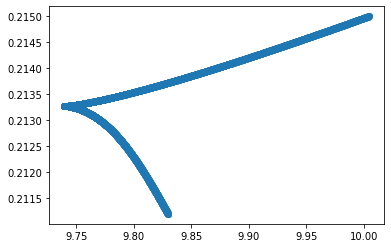

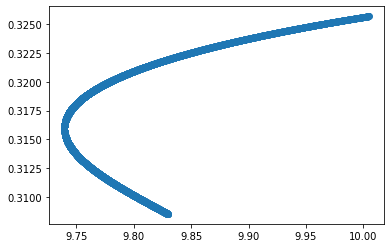

In [ ]:
import matplotlib.pyplot
import pylab

def rho(x,y,z):
  return (x*x+y*y+z*z)**0.5

v_list=[]
for j in range(4000):
  v_list.append(
      (rho(result[j,0], result[j,1], result[j,2]),
       T(result[j,3], result[j,4], result[j,5]))
         )
  

P_list=[]
for j in range(4000):
    P_list.append(
        (rho(result[j,0], result[j,1], result[j,2]),
       P(result[j,0],result[j,1],result[j,2],result[j,3],result[j,4],result[j,5])+T(result[j,3], result[j,4], result[j,5]))
    )  

prelist1 = list(zip(*v_list))
pylab.scatter(list(prelist1[0]),list(prelist1[1]))
pylab.show()

prelist2 = list(zip(*P_list))
pylab.scatter(list(prelist2[0]),list(prelist2[1]))
pylab.show()